<a href="https://colab.research.google.com/github/waqasahmad-developer/Employee-Performance-Predictor/blob/main/Employee_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE PERFORMANCE PREDICTION
 In this project, my goal is to build a regression model to predict employee performance scores based on various employee-related features such as age, department, education level, work hours, job title, and more.



# 🔹 Step 1: Data Loading and Initial Exploration
 I start by importing essential libraries and loading the dataset into a pandas DataFrame. This step also includes viewing the first few rows, checking for missing values, and understanding the structure of the dataset.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
pd.__version__

'2.2.2'

In [ ]:
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')

In [ ]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [ ]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [ ]:
# Checking for null values in the data
print("Missing NULL values in the dataset:")
print(df.isnull().sum())

Missing NULL values in the dataset:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [ ]:
duplicates = df.duplicated()

# Number of Duplicates in the dataset
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


# 🔹 Step 2: Data Cleaning
In this step, I remove unnecessary columns such as Employee_ID (which is just an identifier), Hire Date and Resigned. It’s not useful for our regression task.


In [ ]:
df = df.drop(['Employee_ID', 'Hire_Date', 'Resigned'], axis=1)

In [ ]:
df['Education_Level'].unique()

array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

# 🔹 Step 3: Feature Classification
I divide the columns into numerical and categorical features. This step helps us apply different preprocessing techniques (like scaling or encoding) based on feature types. Addtionally i check the relationship between numerical columns.

In [ ]:
# Identify categorical and numerical columns
categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']

numerical_cols = [
    'Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
    'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
    'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
    'Promotions', 'Employee_Satisfaction_Score'
]

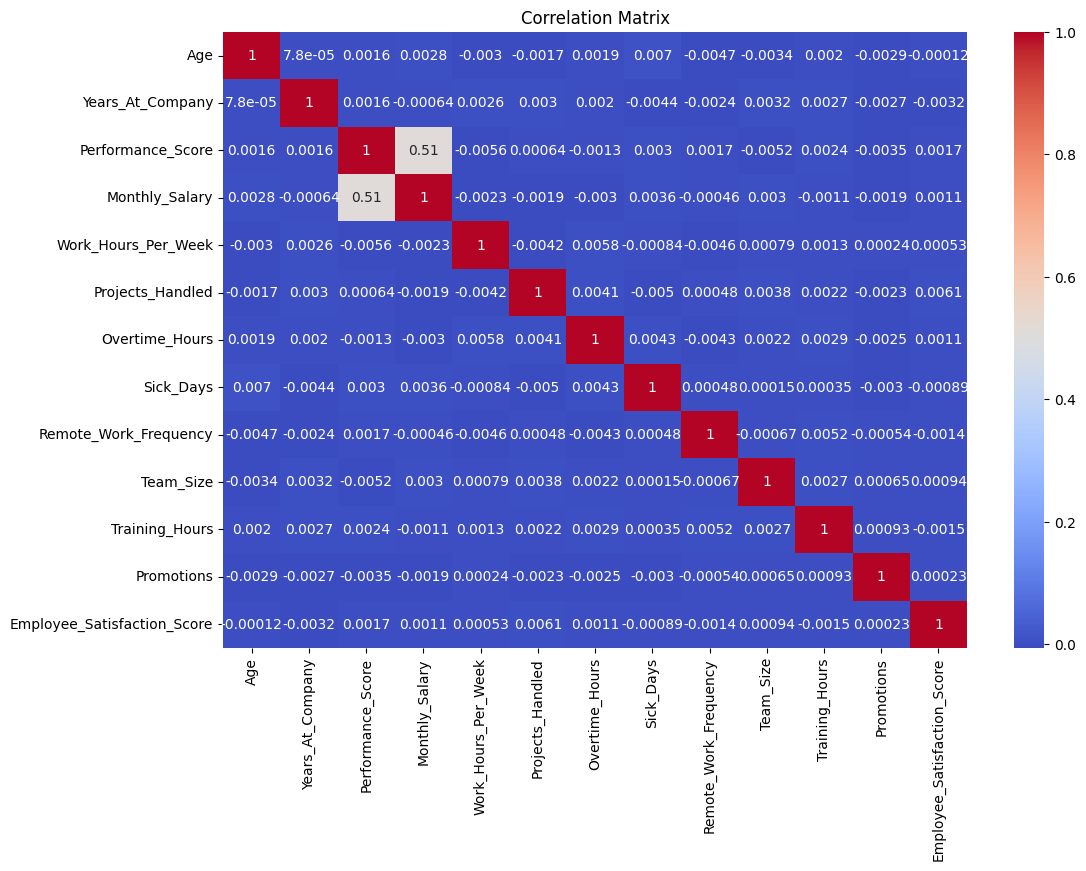

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X_num = df[numerical_cols].dropna()
X_scaled = StandardScaler().fit_transform(X_num)

vif_df = pd.DataFrame()
vif_df["Feature"] = X_num.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_df)


                        Feature       VIF
0                           Age  1.000118
1              Years_At_Company  1.000085
2             Performance_Score  1.351767
3                Monthly_Salary  1.351708
4           Work_Hours_Per_Week  1.000124
5              Projects_Handled  1.000141
6                Overtime_Hours  1.000125
7                     Sick_Days  1.000137
8         Remote_Work_Frequency  1.000104
9                     Team_Size  1.000121
10               Training_Hours  1.000078
11                   Promotions  1.000051
12  Employee_Satisfaction_Score  1.000058


# 🔹 Step 5: Splitting Data
 I split the dataset into training and testing sets (80% training and 20% testing). This helps evaluate the model’s performance on unseen data.

In [ ]:
X = df.drop(['Performance_Score'], axis=1)
y = df['Performance_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
X_train.head()

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,Sales,Other,36,Technician,3,Bachelor,5250.0,55,31,18,9,50,15,7,0,3.80
1,Operations,Female,51,Developer,2,Bachelor,6500.0,60,16,1,14,0,17,12,0,2.20
2,Legal,Female,36,Manager,0,Bachelor,7800.0,30,25,1,1,100,13,6,1,2.20
3,Customer Support,Male,26,Consultant,6,Master,7700.0,58,41,3,3,50,3,27,0,1.09
4,IT,Other,28,Consultant,4,High School,6600.0,40,18,10,9,50,13,76,0,1.22


In [ ]:
y_train.head()

,Performance_Score
0,5
1,3
2,3
3,4
4,2


# 🔹 Step 6: Data Preprocessing with Pipelines
To streamline preprocessing, I build a pipeline using ColumnTransformer to apply StandardScaler to numerical features and OneHotEncoder to categorical features. This ensures our data is transformed consistently during training and prediction.

In [ ]:
# Identifying categorical and numerical columns from X_train


categorical_cols_X = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols_X = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_X),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_X)
])

# 🔹 Step 7: Model Training
 I train multiple regression models using a pipeline, including Linear Regression, Ridge, Lasso, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and SVR. For each model, I calculate R² score, Mean Squared Error (MSE), and Mean Absolute Error (MAE) to evaluate performance.

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# --- Train and Evaluate All Models ---
results = []

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MSE": round(mse, 4),
        "MAE": round(mae, 4)
    })

# --- Display Results in a Table ---
results_df = pd.DataFrame(results)
results_df.sort_values(by="R² Score", ascending=False, inplace=True)
print("🔍 Model Performance Comparison:\n")
print(results_df)

🔍 Model Performance Comparison:

                      Model  R² Score     MSE     MAE
3             Decision Tree    1.0000  0.0000  0.0000
4             Random Forest    1.0000  0.0000  0.0000
5         Gradient Boosting    0.9971  0.0058  0.0633
6  Support Vector Regressor    0.9938  0.0124  0.0824
0         Linear Regression    0.9679  0.0644  0.1880
1          Ridge Regression    0.9679  0.0644  0.1880
2          Lasso Regression   -0.0001  2.0051  1.2032


# 🔹 Step 8: Model Evaluation
I compare the results of all trained models from the table, to determine which model performs best for my problem. I choose the GradientBoostingRegressor over the DecisionTreeRegressor and RandomForestRegressor because the model is performing well and not overfitting and Cross Validate the model with different hyperparameters to check te model performance.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

gbr = GradientBoostingRegressor(random_state=42)


pipe_gbr = make_pipeline(preprocessor, gbr)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe_gbr, X_train, y_train, cv=cv, scoring='r2')

print(f"Cross-validation R² scores: {scores}")
print(f"Mean cross-validation R² score: {scores.mean():.4f}")
print(f"Standard deviation of cross-validation R² scores: {scores.std():.4f}")


mse_scores = cross_val_score(pipe_gbr, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print(f"Mean cross-validation MSE (negative): {mse_scores.mean():.4f}")

mae_scores = cross_val_score(pipe_gbr, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
print(f"Mean cross-validation MAE (negative): {mae_scores.mean():.4f}")

Cross-validation R² scores: [0.99725103 0.99757472 0.99751199 0.99709052 0.9968924 ]
Mean cross-validation R² score: 0.9973
Standard deviation of cross-validation R² scores: 0.0003
Mean cross-validation MSE (negative): -0.0055
Mean cross-validation MAE (negative): -0.0637


In [ ]:
import joblib


best_model_pipeline = make_pipeline(preprocessor, gbr)
best_model_pipeline.fit(X_train, y_train)

# Save the trained pipeline to a file
joblib.dump(best_model_pipeline, 'model.pkl')

print("Model pipeline exported successfully as model.pkl'")


Model pipeline exported successfully as 'employee_performance_model_pipeline.joblib'
